# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleveland data from the UCI Machine Learning Repository. 
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle. 
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* age: age (in years)
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs:  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*  restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Tools
We'll use Pandas, Matplotlib, and Numpy for Data Analysis and Manipulation. Scikit-Learn for Machine Learning.

In [2]:
# Regular EDA (Exploratory Data Analysis) and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline - to put plots within the notebook. We comment this out because it is already inline by default

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [3]:
# Load the data

df = pd.read_csv('heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Exploration (EDA)

Goal: Find out more about the data and become a subject matter expert on the data.
    
1. What question(s) are we trying to solve?
> Whether or not we can find enough patterns in the data to predict heart disease.
2. What kind of data do we have and how do we treat different types? 
> In this problem, our data is purely numerical.
3. What's missing from the data and how do we deal with them?
> There are no missing values.
4. Where are the outliers and why should we care about them?
5. How can we add, change, or remove features to get more out of our data?
    


### Data according to label

In [3]:
# Is our data balanced or imbalanced?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

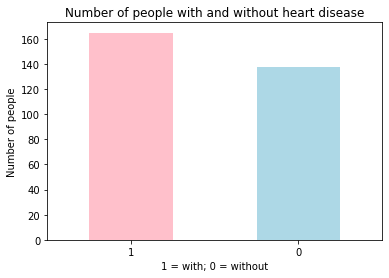

In [4]:
df['target'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.xticks(rotation=0)
plt.ylabel('Number of people')
plt.xlabel('1 = with; 0 = without')
plt.title('Number of people with and without heart disease');

The data between those with and without heart disease is relatively balanced.

In [5]:
# Missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


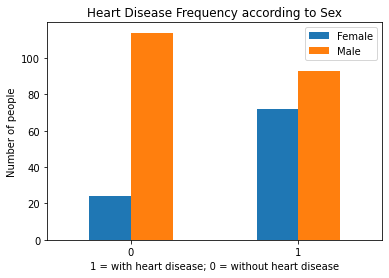

In [9]:
pd.crosstab(df.target, df.sex).plot.bar()
plt.title('Heart Disease Frequency according to Sex')
plt.xticks(rotation=0)
plt.xlabel('1 = with heart disease; 0 = without heart disease')
plt.ylabel('Number of people')
plt.legend(['Female', 'Male']);

### Heart Disease function of Age and Max Heart Rate

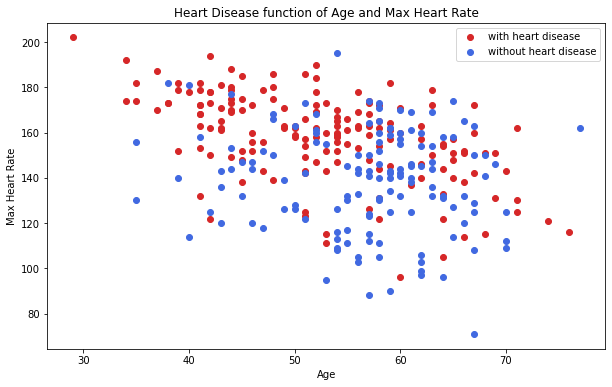

In [10]:
plt.figure(figsize=(10,6))

# Scatter plot with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='tab:red')

# Scatter plot with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='royalblue')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Heart Disease function of Age and Max Heart Rate')
plt.legend(['with heart disease', 'without heart disease']);

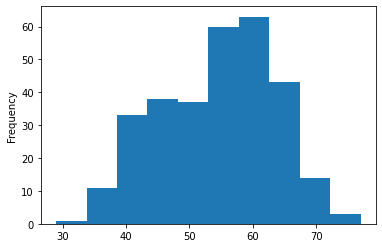

In [11]:
# Check distribution of Age with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain type
cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

In [12]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


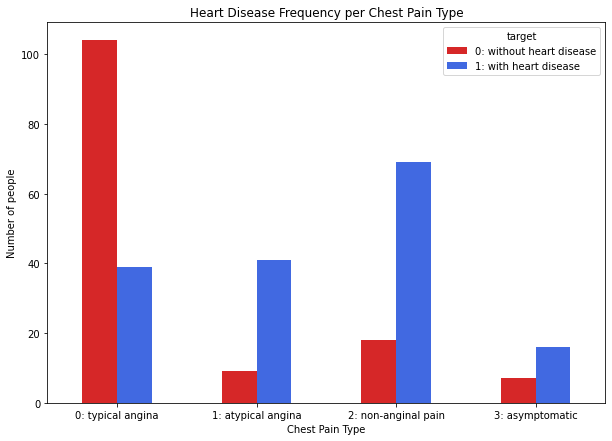

In [13]:
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10,7),
                                       color=['tab:red', 'royalblue'])
plt.xticks(ticks=[0,1,2,3],
           labels=['0: typical angina',
                   '1: atypical angina', 
                   '2: non-anginal pain', 
                   '3: asymptomatic'], 
           rotation=0)
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of people')
plt.legend(['0: without heart disease',
            '1: with heart disease'],
           title='target')
plt.title('Heart Disease Frequency per Chest Pain Type');

## Correlation Matrix

In [14]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


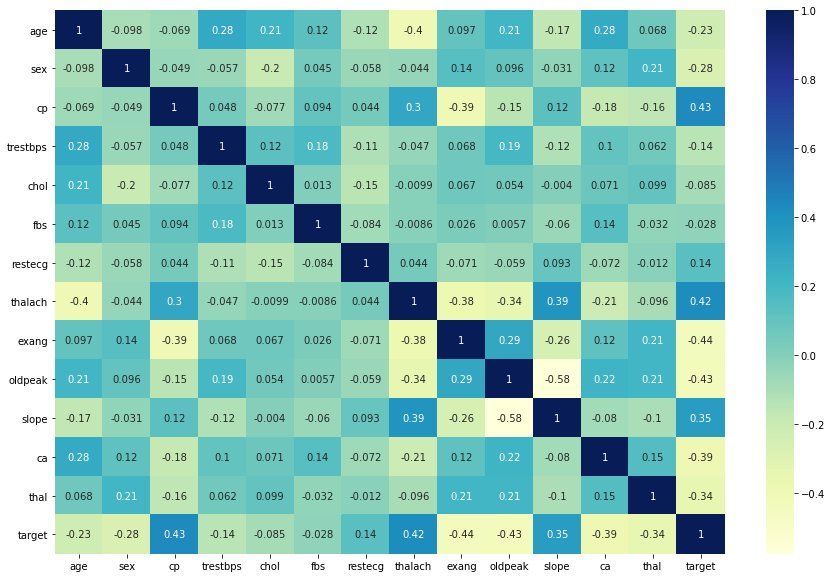

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 cmap='YlGnBu')

## 5. Modelling

We're going to try the following models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Split into features and labels
X = df.drop('target', axis=1)
y = df['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y, len(X), len(y)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 303,
 303)

In [19]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [20]:
# Build model/s
models = {'Logistic Regression': LogisticRegression(),
          'KNN Classifier': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier()}

In [21]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates machine learning models.
    
    Parameters
    ----------
    models (dict) - models to fit and score
    X_train - features training set
    y_train - labels training set
    X_test - features test set
    y_test - labels test set
    
    Returns
    -------
    model_scores - dictionary containing the models' scores
    '''
    np.random.seed(42)
    model_scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)
        
    return model_scores

In [43]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\Sofia\OneDrive - University of the Philippines\Sofia\Data Science\Projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN Classifier': 0.6557377049180327,
 'Random Forest Classifier': 0.8852459016393442}

### Model Comparison

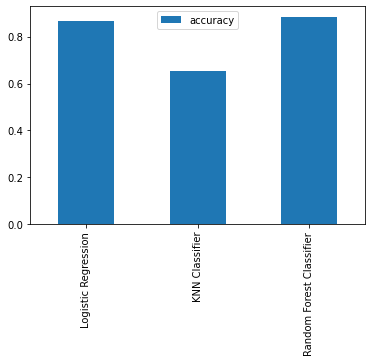

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter Tuning

**Tuning K-Nearest Neighbors Classifier**

In [24]:
train_scores = []
test_scores = []

# List of different values for n neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
test_scores

[0.5081967213114754,
 0.47540983606557374,
 0.5901639344262295,
 0.6229508196721312,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.5573770491803278,
 0.6065573770491803,
 0.6229508196721312,
 0.6229508196721312]

Max KNN Score on the test data: 67%


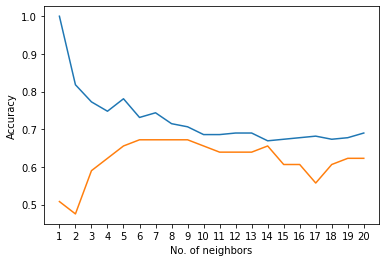

In [25]:
# Visualize test scores
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21))
print(f'Max KNN Score on the test data: {max(test_scores)*100:.2g}%')

**Tune LogisticRegression & RandomForestClassifier With RandomizedSearchCV**

In [44]:
# Hyperparameter distribution for Logistic Regression
log_reg_dist = {'C': [1], 
                'solver': ['lbfgs', 'liblinear'], 
                'max_iter': [100, 1000]}

In [45]:
# Tune Logistic Regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_dist,
                                n_iter=20, cv=5, verbose=2)

rs_log_reg.fit(X_train, y_train)

C:\Users\Sofia\OneDrive - University of the Philippines\Sofia\Data Science\Projects\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Sofia\OneDrive - University of the Philippines\Sofia\Data Science\Projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] solver=lbfgs, max_iter=100, C=1 .................................
[CV] .................. solver=lbfgs, max_iter=100, C=1, total=   0.1s
[CV] solver=lbfgs, max_iter=100, C=1 .................................
[CV] .................. solver=lbfgs, max_iter=100, C=1, total=   0.1s
[CV] solver=lbfgs, max_iter=100, C=1 .................................


C:\Users\Sofia\OneDrive - University of the Philippines\Sofia\Data Science\Projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sofia\OneDrive - University of the Philippines\Sofia\Data Science\Projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentati

[CV] .................. solver=lbfgs, max_iter=100, C=1, total=   0.1s
[CV] solver=lbfgs, max_iter=100, C=1 .................................
[CV] .................. solver=lbfgs, max_iter=100, C=1, total=   0.1s
[CV] solver=lbfgs, max_iter=100, C=1 .................................
[CV] .................. solver=lbfgs, max_iter=100, C=1, total=   0.1s
[CV] solver=liblinear, max_iter=100, C=1 .............................
[CV] .............. solver=liblinear, max_iter=100, C=1, total=   0.0s
[CV] solver=liblinear, max_iter=100, C=1 .............................
[CV] .............. solver=liblinear, max_iter=100, C=1, total=   0.0s
[CV] solver=liblinear, max_iter=100, C=1 .............................
[CV] .............. solver=liblinear, max_iter=100, C=1, total=   0.0s
[CV] solver=liblinear, max_iter=100, C=1 .............................
[CV] .............. solver=liblinear, max_iter=100, C=1, total=   0.0s
[CV] solver=liblinear, max_iter=100, C=1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1], 'max_iter': [100, 1000],
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=2)

In [46]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 100, 'C': 1}

In [48]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN Classifier': 0.6557377049180327,
 'Random Forest Classifier': 0.8852459016393442}

In [49]:
# Hyperparameter distribution for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(100, 1000, 100),
           'max_depth': [None, 3, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [50]:
# Tune RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid,
                                n_iter=5, cv=5, verbose=2)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3, total=   2.1s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3, total=   2.1s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3, total=   2.3s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3, total=   2.3s
[CV] n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3 
[CV]  n_estimators=600, min_samples_split=6, min_samples_leaf=11, max_depth=3, total=   2.1s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=9, max_depth=None, total=   2.6s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=9, max_depth=None, total=   2.5s
[CV] n_estimators=700, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   50.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=2)

In [51]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [52]:
rs_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': None}

## Hyperparameter Tuning using GridSearchCV

In [53]:
# Tuning RandomForestClassifier

rf_grid = {'n_estimators': [100, 700, 1200],
           'min_samples_split': [2, 3],
           'min_samples_leaf': [1,9,5]}

gs_rf = GridSearchCV(RandomForestClassifier(), rf_grid, cv=5, verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=100 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=100 .......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=100 .......
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=700 .......
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   3.1s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=700 .......
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   2.8s
[CV] min_samples_leaf=1, min_samples_split=2, n_estimators=700 .......
[CV]  min_samples_leaf=1, min_samples_split=2, n_estimators=700, total=   2.8s
[CV] min_samples_leaf

[CV]  min_samples_leaf=9, min_samples_split=3, n_estimators=1200, total=   4.6s
[CV] min_samples_leaf=9, min_samples_split=3, n_estimators=1200 ......
[CV]  min_samples_leaf=9, min_samples_split=3, n_estimators=1200, total=   4.8s
[CV] min_samples_leaf=9, min_samples_split=3, n_estimators=1200 ......
[CV]  min_samples_leaf=9, min_samples_split=3, n_estimators=1200, total=   4.8s
[CV] min_samples_leaf=9, min_samples_split=3, n_estimators=1200 ......
[CV]  min_samples_leaf=9, min_samples_split=3, n_estimators=1200, total=   4.9s
[CV] min_samples_leaf=5, min_samples_split=2, n_estimators=100 .......
[CV]  min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] min_samples_leaf=5, min_samples_split=2, n_estimators=100 .......
[CV]  min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] min_samples_leaf=5, min_samples_split=2, n_estimators=100 .......
[CV]  min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] min_samples_

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 9, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 700, 1200]},
             verbose=2)

In [54]:
gs_rf.score(X_test, y_test)

0.8688524590163934

In [55]:
gs_rf.best_params_

{'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 100}

In [56]:
# Tuning Logistic Regression
log_reg_grid = {'solver': ['liblinear'], 'max_iter': [100, 700], 'C': [0.1, 1, 10]}

gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_grid, cv=5, verbose=2)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=100, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=700, solver=liblinear ...........................
[CV] ............ C=0.1, max_iter=700, solver=liblinear, total=   0.0s
[CV] C=0.1, max_iter=700, solver=liblinear ...........................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, max_iter=100, solver=liblinear .............................
[CV] .............. C=1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1, max_iter=100, solver=liblinear .............................
[CV] .............. C=1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1, max_iter=100, solver=liblinear .............................
[CV] .............. C=1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1, max_iter=100, solver=liblinear .............................
[CV] .............. C=1, max_iter=100, solver=liblinear, total=   0.0s
[CV] C=1, max_iter=700, solver=liblinear .............................
[CV] .............. C=1, max_iter=700, solver=liblinear, total=   0.0s
[CV] C=1, max_iter=700, solver=liblinear .............................
[CV] .............. C=1, max_iter=700, solver=liblinear, total=   0.0s
[CV] C=1, max_iter=700, solver=liblinear .............................
[CV] .............. C=1, max_iter=700, solver=liblinear, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 700],
                         'solver': ['liblinear']},
             verbose=2)

In [57]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [58]:
gs_log_reg.best_params_

{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

# Evaluating model, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1 score

*Cross-validation will be used where possible.*

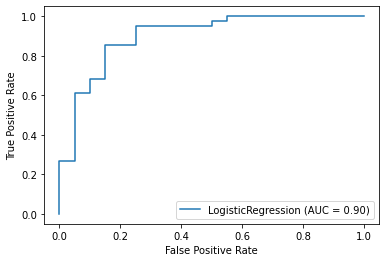

In [61]:
# Instantiate the model with best parameters
clf = LogisticRegression(C=1, max_iter=100, solver='liblinear')

# Fit the model
clf.fit(X_train, y_train)

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test);

In [64]:
y_test

145    1
42     1
65     1
60     1
92     1
      ..
236    0
67     1
90     1
17     1
2      1
Name: target, Length: 61, dtype: int64

In [65]:
# Make predictions
y_pred = clf.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[15,  5],
       [ 2, 39]], dtype=int64)

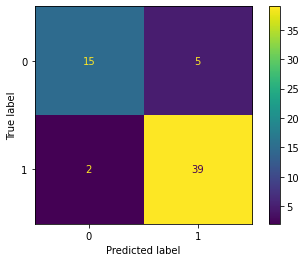

In [70]:
plot_confusion_matrix(clf, X_test, y_test);

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.89      0.95      0.92        41

    accuracy                           0.89        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.89      0.89      0.88        61



**Cross-validated Accuracy, Precision, Recall, and F1 scores**

In [78]:
metrics = ['accuracy', 'precision', 'recall', 'f1']

In [102]:
# Function to compute cross-validated Accuracy, Precision, Recall, and F1 scores

def compute_metric_scores(estimator, metrics, X, y, num_of_models=5):
    metric_scores = {}
    for metric in metrics:
        metric_scores[metric] = cross_val_score(estimator, X, y,
                                                cv=num_of_models, 
                                                scoring=metric)
    return metric_scores

In [106]:
metric_scores = compute_metric_scores(clf, metrics, X_test, y_test)
metric_scores

{'accuracy': array([0.92307692, 0.66666667, 0.91666667, 0.91666667, 0.75      ]),
 'precision': array([1.        , 0.75      , 0.88888889, 0.88888889, 0.77777778]),
 'recall': array([0.88888889, 0.75      , 1.        , 1.        , 0.875     ]),
 'f1': array([0.94117647, 0.75      , 0.94117647, 0.94117647, 0.82352941])}

In [94]:
def compute_metric_mean_scores(scores):
    mean_scores = {}
    for metric, array in scores.items():
        mean_scores[metric] = np.mean(array)
    return mean_scores

In [107]:
metric_mean_scores = compute_metric_mean_scores(metric_scores)
metric_mean_scores

{'accuracy': 0.8346153846153846,
 'precision': 0.861111111111111,
 'recall': 0.9027777777777779,
 'f1': 0.8794117647058822}

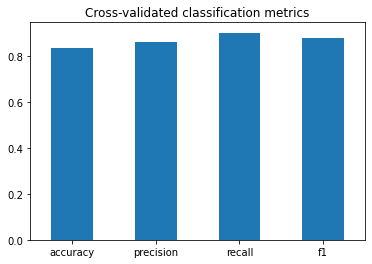

In [128]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(metric_mean_scores.values(), index=metric_mean_scores.keys())
cv_metrics.plot.bar(legend=False)
plt.xticks(rotation=0)
plt.title('Cross-validated classification metrics');

### Feature Importance

Feature importance is another way of asking which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model.

**Feature importance of Logistic Regression**

In [130]:
# Check coef_
clf.coef_

array([[ 0.02002651, -1.57125991,  0.70974503, -0.01646397, -0.00347072,
        -0.21431278,  0.64147185,  0.02983723, -0.92053141, -0.54160945,
         0.35626279, -0.71295858, -0.77906756]])

In [133]:
# Match coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.020026505764564245,
 'sex': -1.5712599136736796,
 'cp': 0.709745033063706,
 'trestbps': -0.016463967664244333,
 'chol': -0.003470720504041314,
 'fbs': -0.21431277757644476,
 'restecg': 0.6414718519765883,
 'thalach': 0.029837230906337085,
 'exang': -0.9205314068367085,
 'oldpeak': -0.5416094476293489,
 'slope': 0.3562627879170945,
 'ca': -0.7129585841617135,
 'thal': -0.7790675613654283}

In [149]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict.values(), index=feature_dict.keys())
feature_df

,0
age,0.020027
sex,-1.571260
cp,0.709745
trestbps,-0.016464
chol,-0.003471
fbs,-0.214313
restecg,0.641472
thalach,0.029837
exang,-0.920531
oldpeak,-0.541609


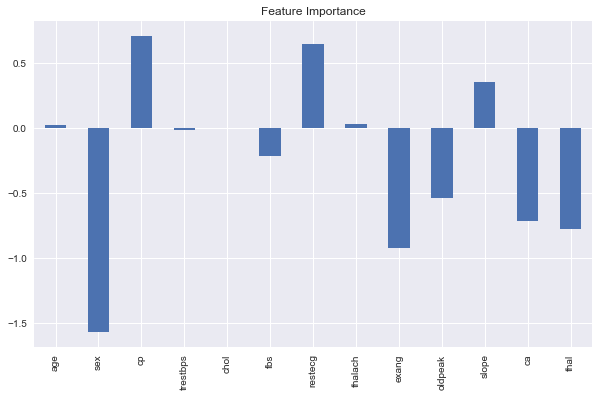

In [154]:
feature_df.plot.bar(title='Feature Importance', legend=False, figsize=(10,6))
plt.style.use('seaborn');

The most important features on this data are sex, exang, cp, thal, ca.

The least important features are age, trestbps, chol, thalach.